# **DATA EXPLORATORY**
___

## **DATA**

In [1]:
#LIBRERIAS
import pandas as pd
import matplotlib.pyplot as plt
import utils as eda

In [ ]:
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("/workspaces/Proyecto-K-vecinos-Jese/data/data.csv")

Before the EDA, the target must be balanced

In [4]:
def categorize_quality(q):
    if q <= 4:
        return 0      # Baja
    elif q <= 6:
        return 1      # Media
    else:
        return 2      # Alta

df["label"] = df["quality"].apply(categorize_quality)


In [5]:
target = 'label'

___

## **DATA DISTRIBUTION**

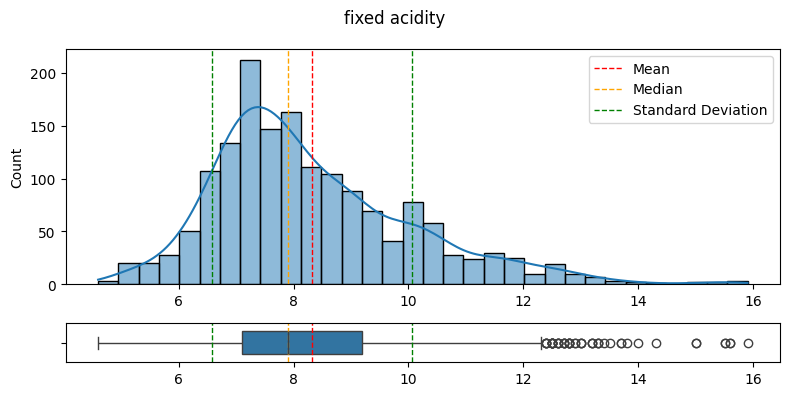

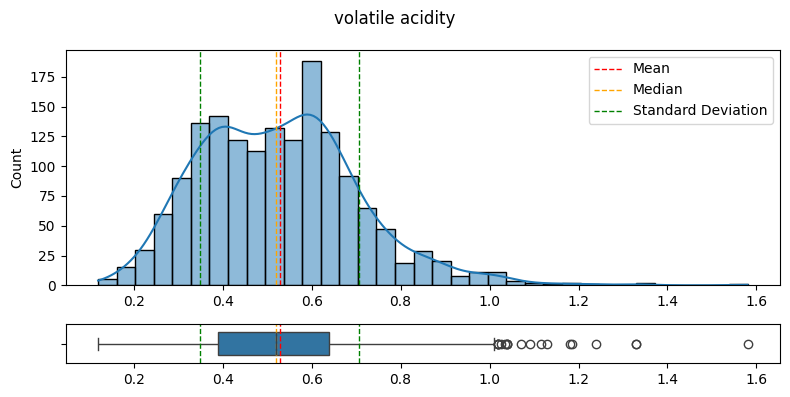

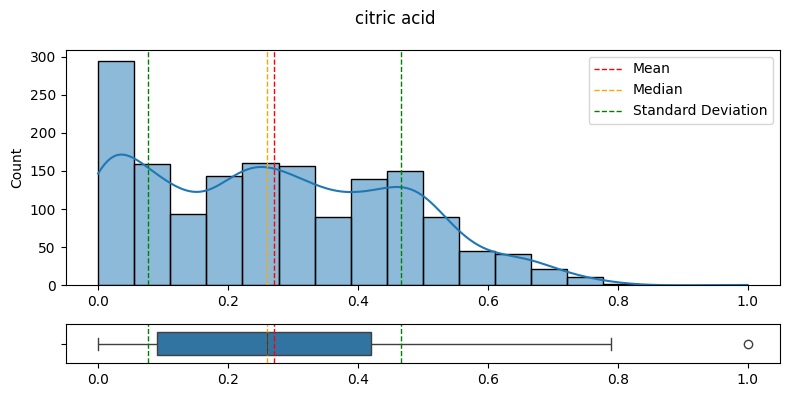

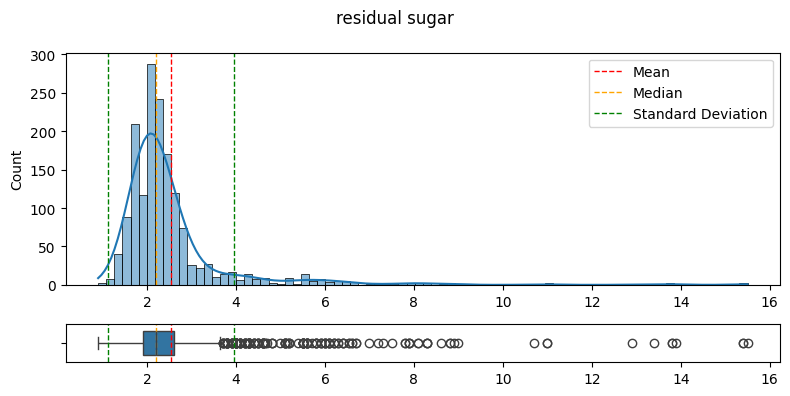

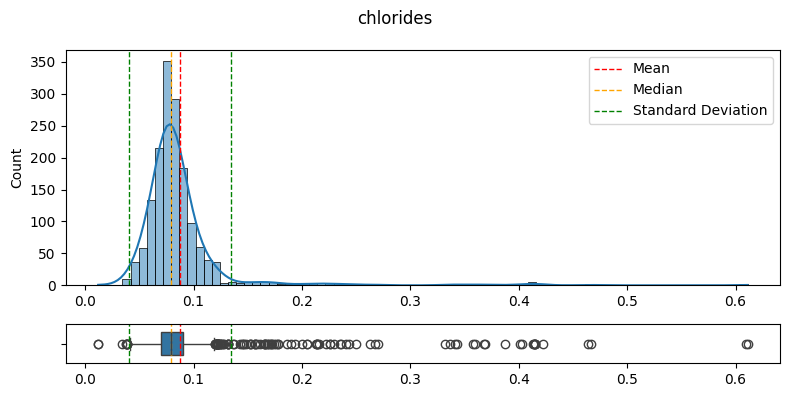

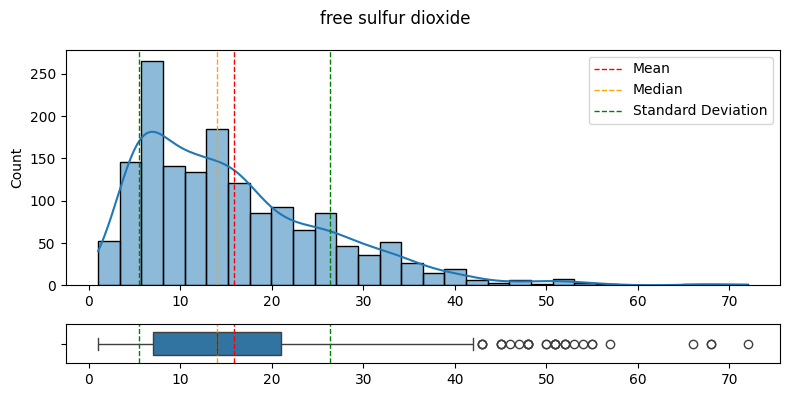

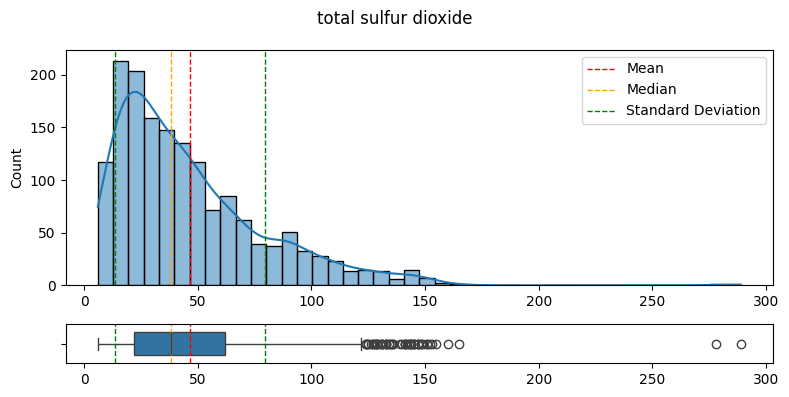

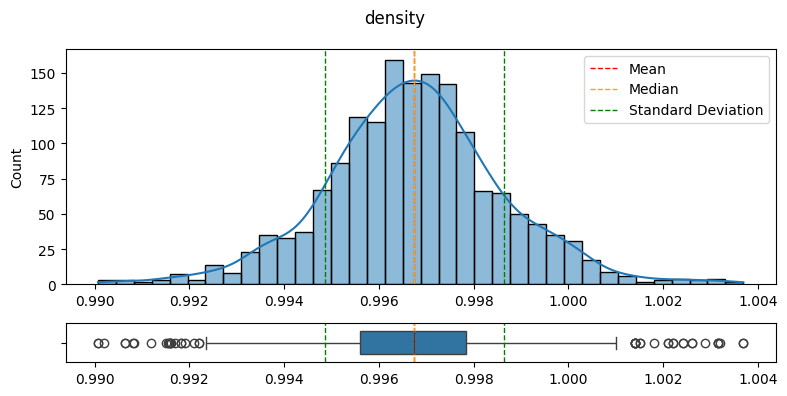

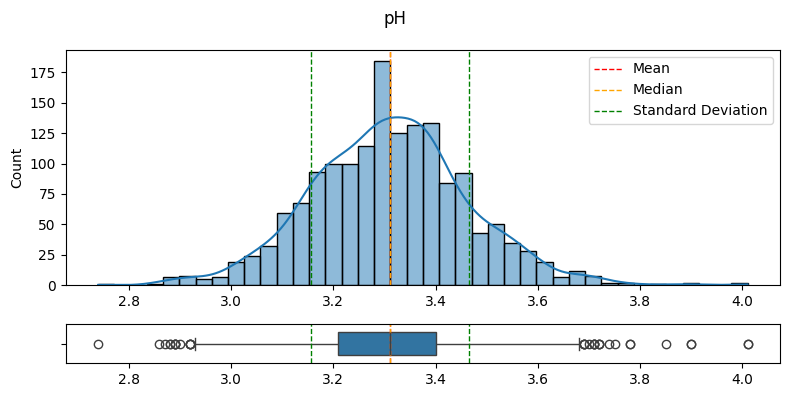

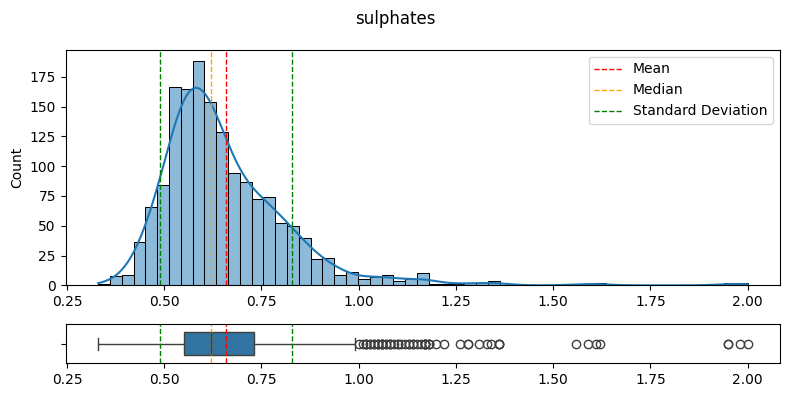

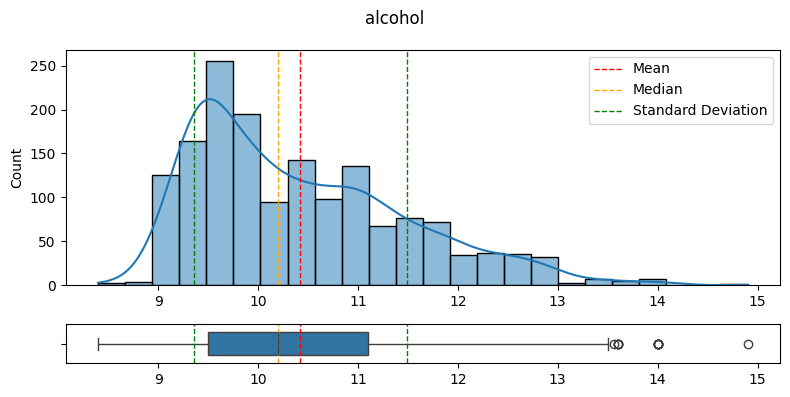

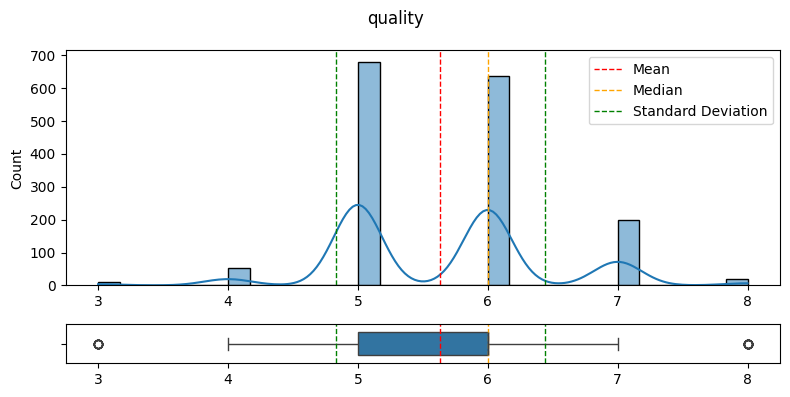

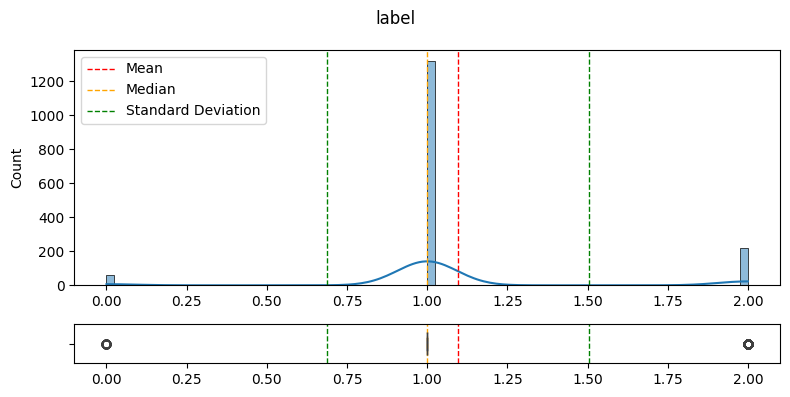

In [6]:
eda.plot_numerical_data (df)

## **MULTIVARIABLE DATA**

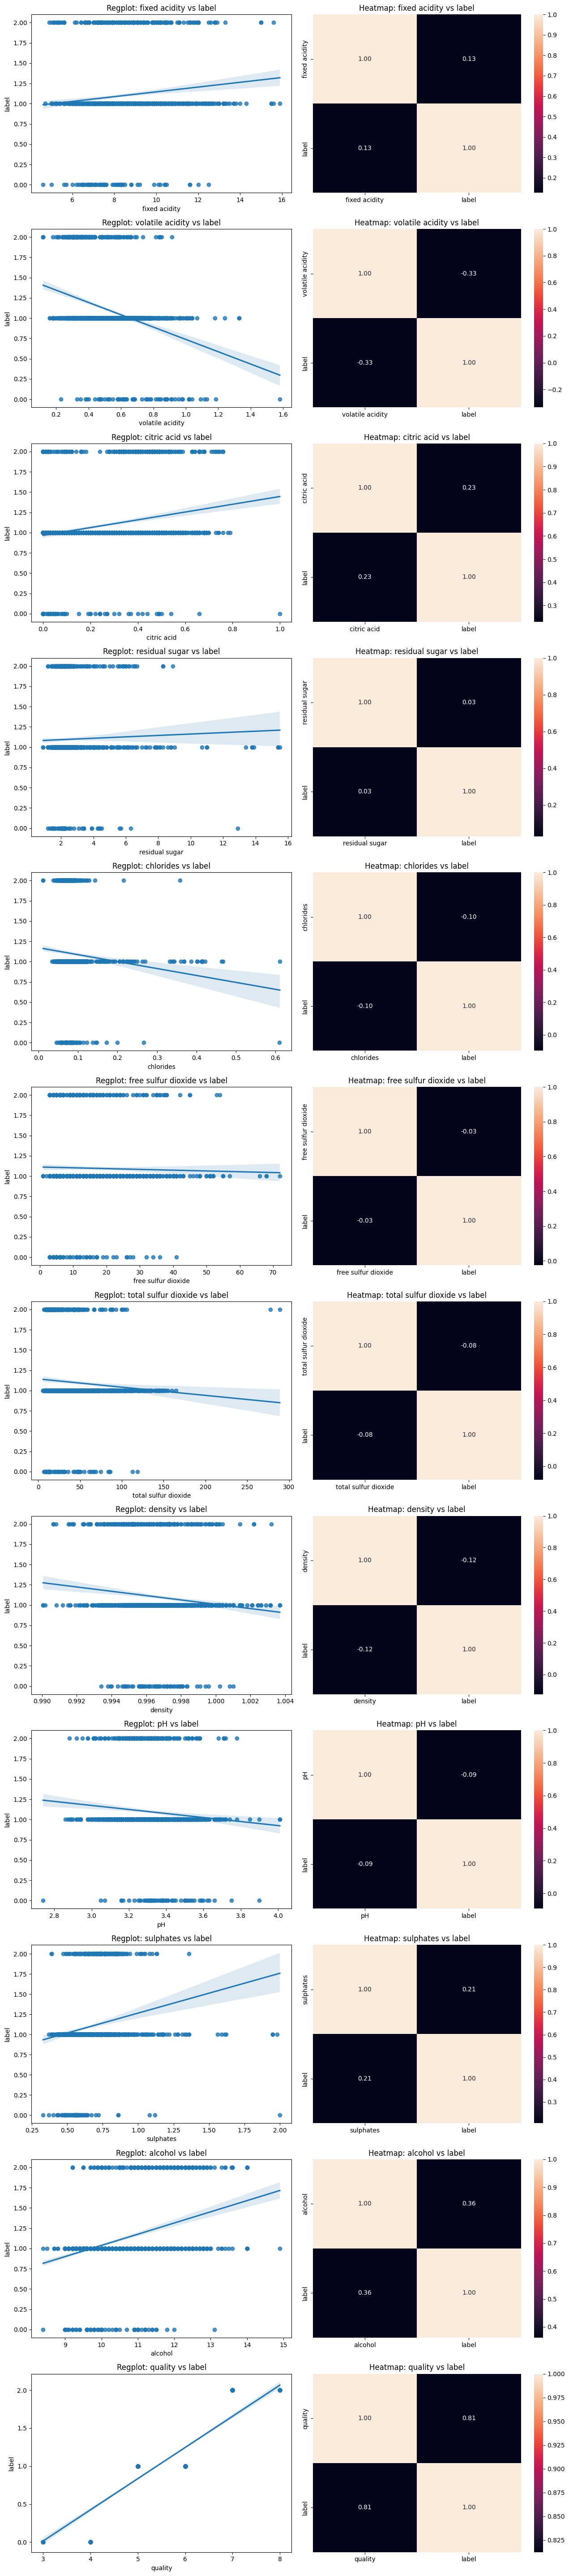

In [7]:
eda.plot_scatter_heatmaps(df, target)

## **CORRELATION MATRIX**

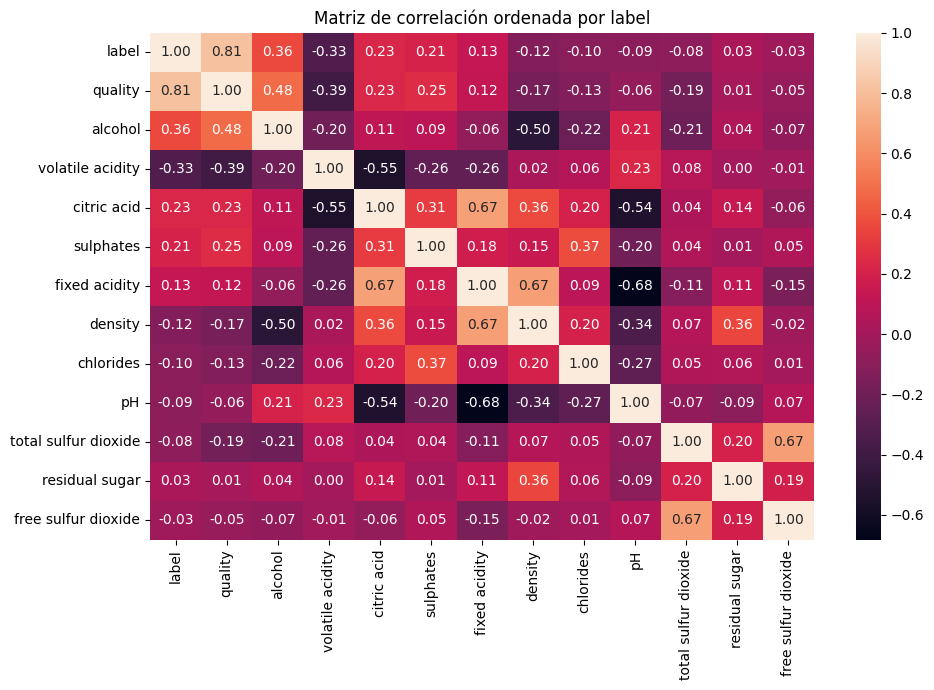

In [9]:
eda.general_heatmap_sorted(df, target)

##  **Conclusiones del Análisis**

El análisis exploratorio mostró que las variables químicas del vino presentan distribuciones mayormente asimétricas y con presencia de valores atípicos, especialmente en variables como *residual sugar*, *chlorides* y los niveles de dióxido de azufre. Estas diferencias de escala justificaron el uso de estandarización antes de entrenar el modelo KNN.

El análisis de correlación reveló que:

- **Alcohol** presenta la relación positiva más fuerte con la calidad del vino.
- **Volatile acidity** muestra una relación negativa con la calidad.
- **Sulphates** y **citric acid** presentan correlaciones positivas moderadas.
- Variables como *residual sugar* y *free sulfur dioxide* tienen baja relación con la calidad.

Esto sugiere que la calidad del vino está más influenciada por el equilibrio químico que por la cantidad de azúcares residuales.

Debido al desbalance en las categorías de calidad, se creará una variable categórica (`label`) agrupando los vinos en baja, media y alta calidad para mejorar la estabilidad del modelo.

___

## **SPLIT**

In [7]:
X = df.drop("label", axis=1)
y = df["label"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

### **GUARDAMOS**

In [9]:
X_train.to_csv("../data/processed/X_train.csv", index=False)
X_test.to_csv("../data/processed/X_test.csv", index=False)
y_train.to_csv("../data/processed/y_train.csv", index=False)
y_test.to_csv("../data/processed/y_test.csv", index=False)
